# Using ``dask.distributed`` as Parallel Pool Example

This example shows how you can use any parallel pool-executor like object to run combos - specifally the [dask.distributed.Client](https://distributed.readthedocs.io/en/latest/client.html).

In [1]:
%config InlineBackend.figure_formats = ['svg']
import numpy as np
from dask.distributed import Client

import xyzpy as xyz

First we instantiate the client:

In [2]:
address = None  # put in an actual address like '127.0.0.1:8786' if you have a scheduler running
c = Client(address=address)
c

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 8,Total memory: 15.33 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:33273,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 8
Started: Just now,Total memory: 15.33 GiB
Comm: tcp://127.0.0.1:46341,Total threads: 2
Dashboard: http://127.0.0.1:33825/status,Memory: 3.83 GiB
Nanny: tcp://127.0.0.1:33773,


The ``Client`` instance can act like a normal parallel pool since it has a submit method and returns futures:

In [3]:
c.submit

<bound method Client.submit of <Client: 'tcp://127.0.0.1:33273' processes=4 threads=8, memory=15.33 GiB>>

Let's define our test function and ``combos``:

In [4]:
def rad(x, y, n):
    r = (x**n + y**n) ** (1 / n)
    if r == 0.0:
        return 1
    return np.sin(r) / r


combos = {
    "x": np.linspace(-15, 15, 51),
    "y": np.linspace(-15, 15, 51),
    "n": [2, 4, 6],
}

r = xyz.Runner(rad, var_names="sinc2d")

Now we can run (or ``harvest``, or ``grow_missing``) our combos, supplying the ``Client`` instance to the ``executor=`` keyword:

In [5]:
r.run_combos(combos, executor=c)

100%|##########| 7803/7803 [00:23<00:00, 326.77it/s]


<xarray.Dataset>
Dimensions:  (x: 51, y: 51, n: 3)
Coordinates:
  * x        (x) float64 -15.0 -14.4 -13.8 -13.2 -12.6 ... 13.2 13.8 14.4 15.0
  * y        (y) float64 -15.0 -14.4 -13.8 -13.2 -12.6 ... 13.2 13.8 14.4 15.0
  * n        (n) int64 2 4 6
Data variables:
    sinc2d   (x, y, n) float64 0.03308 -0.04752 -0.05369 ... -0.04752 -0.05369

That should take enough time to check out client status including the tasks being processed on for example: http://127.0.0.1:8787/tasks.

Finally, visualize the output:

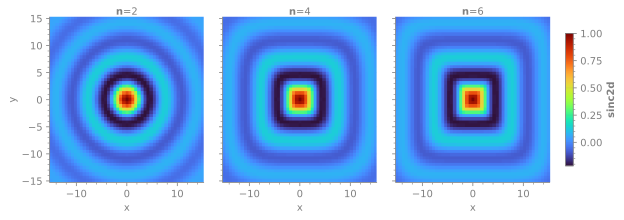

(<Figure size 900x300 with 3 Axes>,
 array([[<Axes: xlabel='x', ylabel='y'>, <Axes: xlabel='x'>,
         <Axes: xlabel='x'>]], dtype=object))

In [11]:
r.last_ds.xyz.infiniplot("x", "y", z="sinc2d", col="n", palette="turbo")